In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline

<h2>1. 데이터셋 불러오기</h2>

In [436]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')

In [437]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [438]:
submission=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [439]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [440]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [441]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [442]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot: >

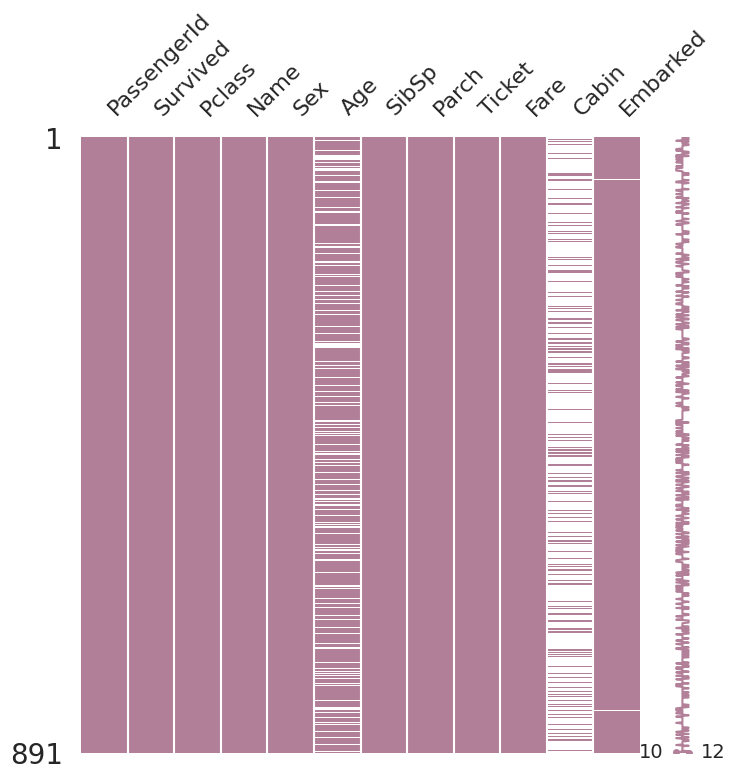

In [443]:
msno.matrix(df=train.iloc[:,:],figsize=(8,8),color=(0.7,0.5,0.6))

<AxesSubplot: >

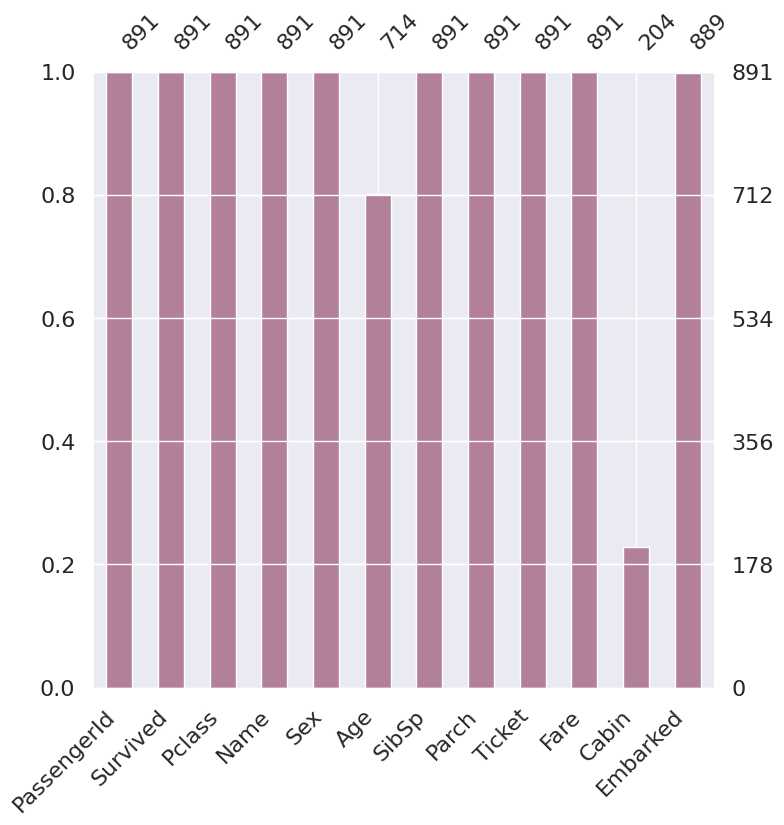

In [444]:
msno.bar(df=train.iloc[:,:],figsize=(8,8),color=(0.7,0.5,0.6))

<AxesSubplot: >

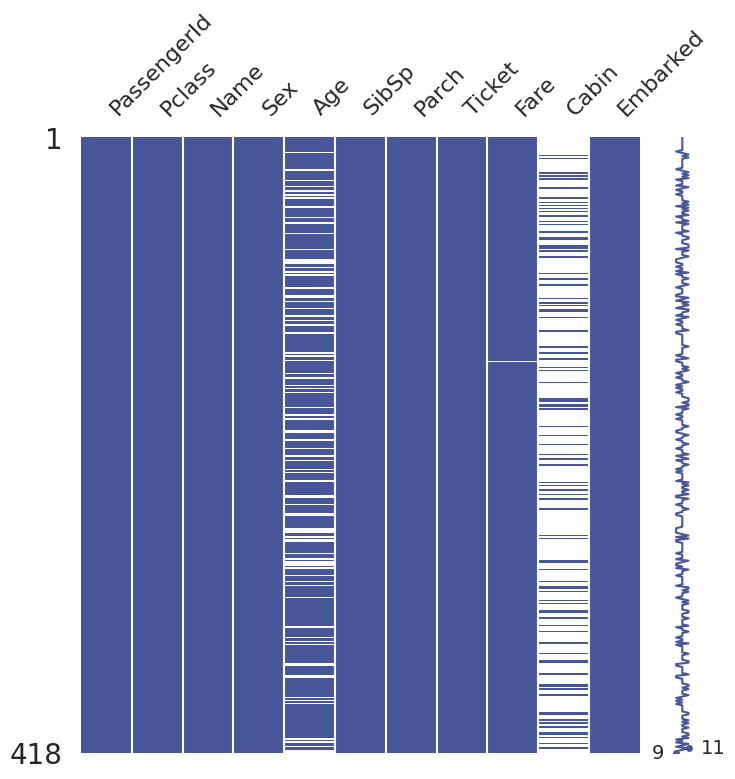

In [445]:
msno.matrix(df=test.iloc[:,:],figsize=(8,8),color=(0.28,0.34,0.6))

<AxesSubplot: >

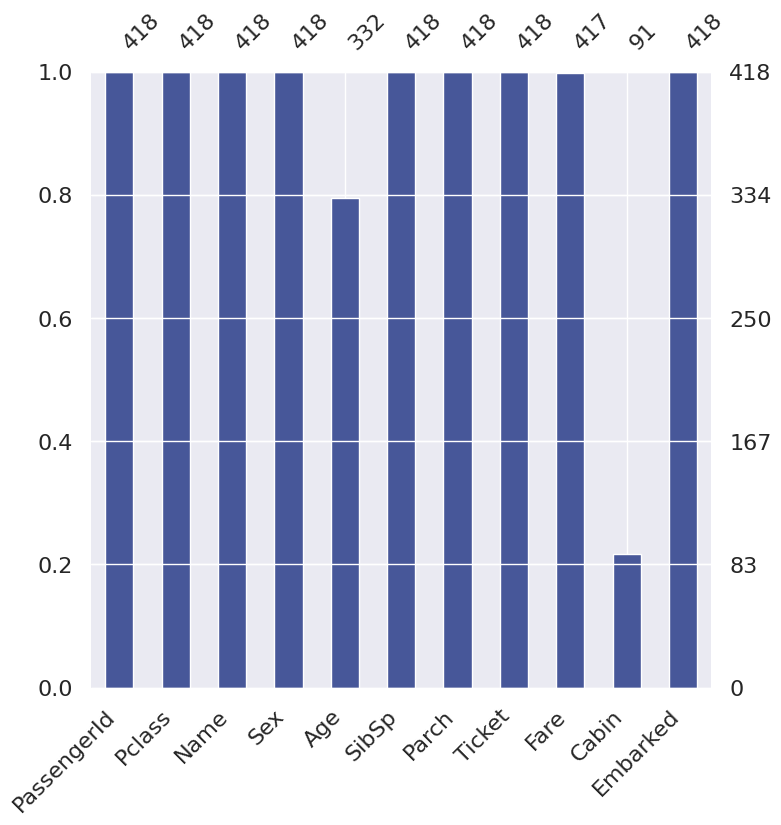

In [446]:
msno.bar(df=test.iloc[:,:],figsize=(8,8),color=(0.28,0.34,0.6))

<h2>1.2 Target label 확인</h2>

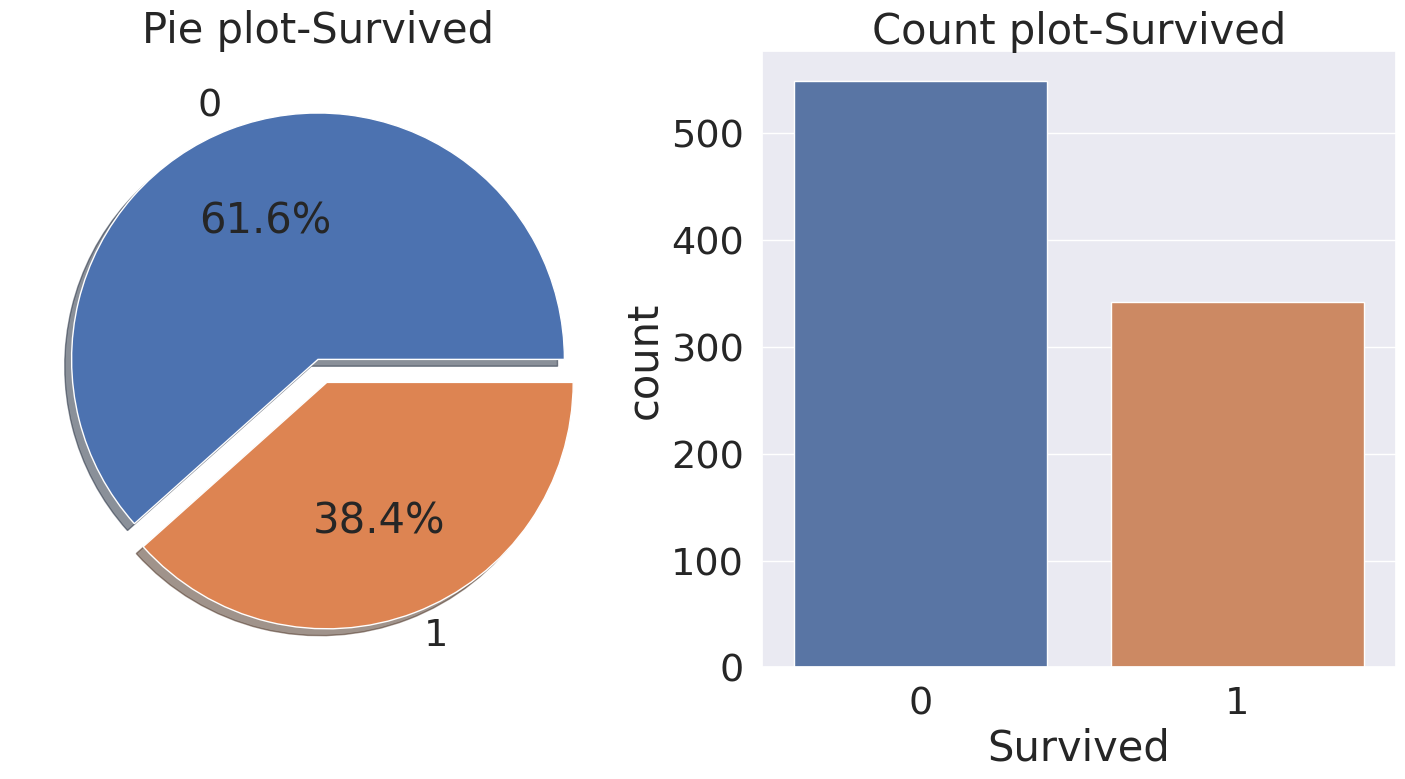

In [447]:
f,ax=plt.subplots(1,2,figsize=(18,8))

train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot-Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived',data=train,ax=ax[1])
ax[1].set_title('Count plot-Survived')

plt.show()

In [448]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<h2>2. EDA</h2>

In [449]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [450]:
pd.crosstab(train['Pclass'],train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot: xlabel='Pclass'>

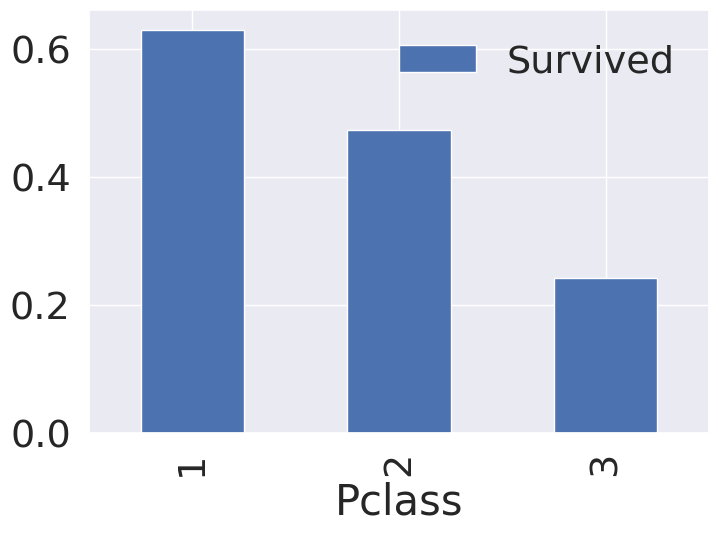

In [451]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().plot.bar()

<AxesSubplot: xlabel='Pclass', ylabel='count'>

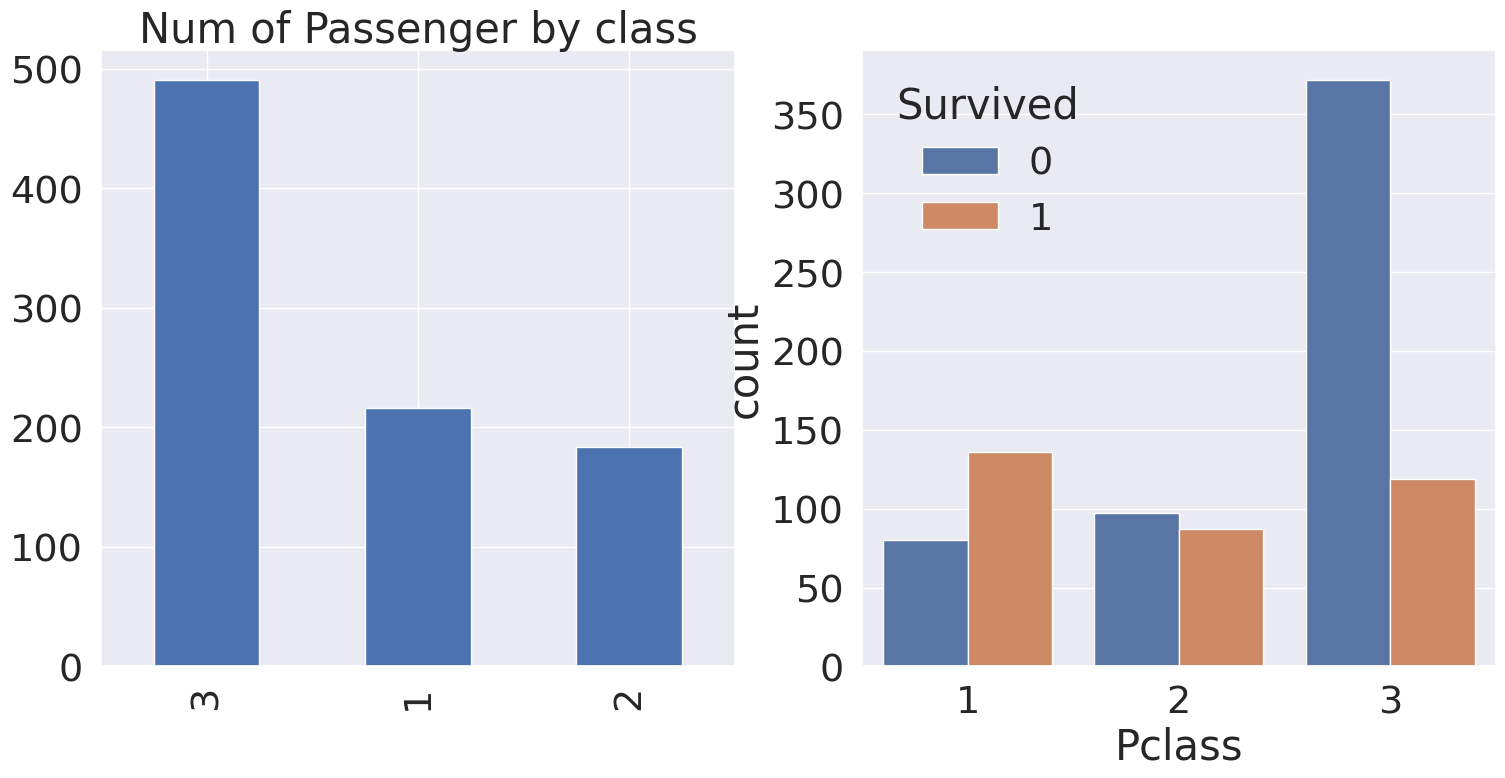

In [452]:
f,ax=plt.subplots(1,2,figsize=(18,8))

train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Num of Passenger by class')

sns.countplot(x='Pclass',hue='Survived',data=train)

<AxesSubplot: xlabel='Sex', ylabel='count'>

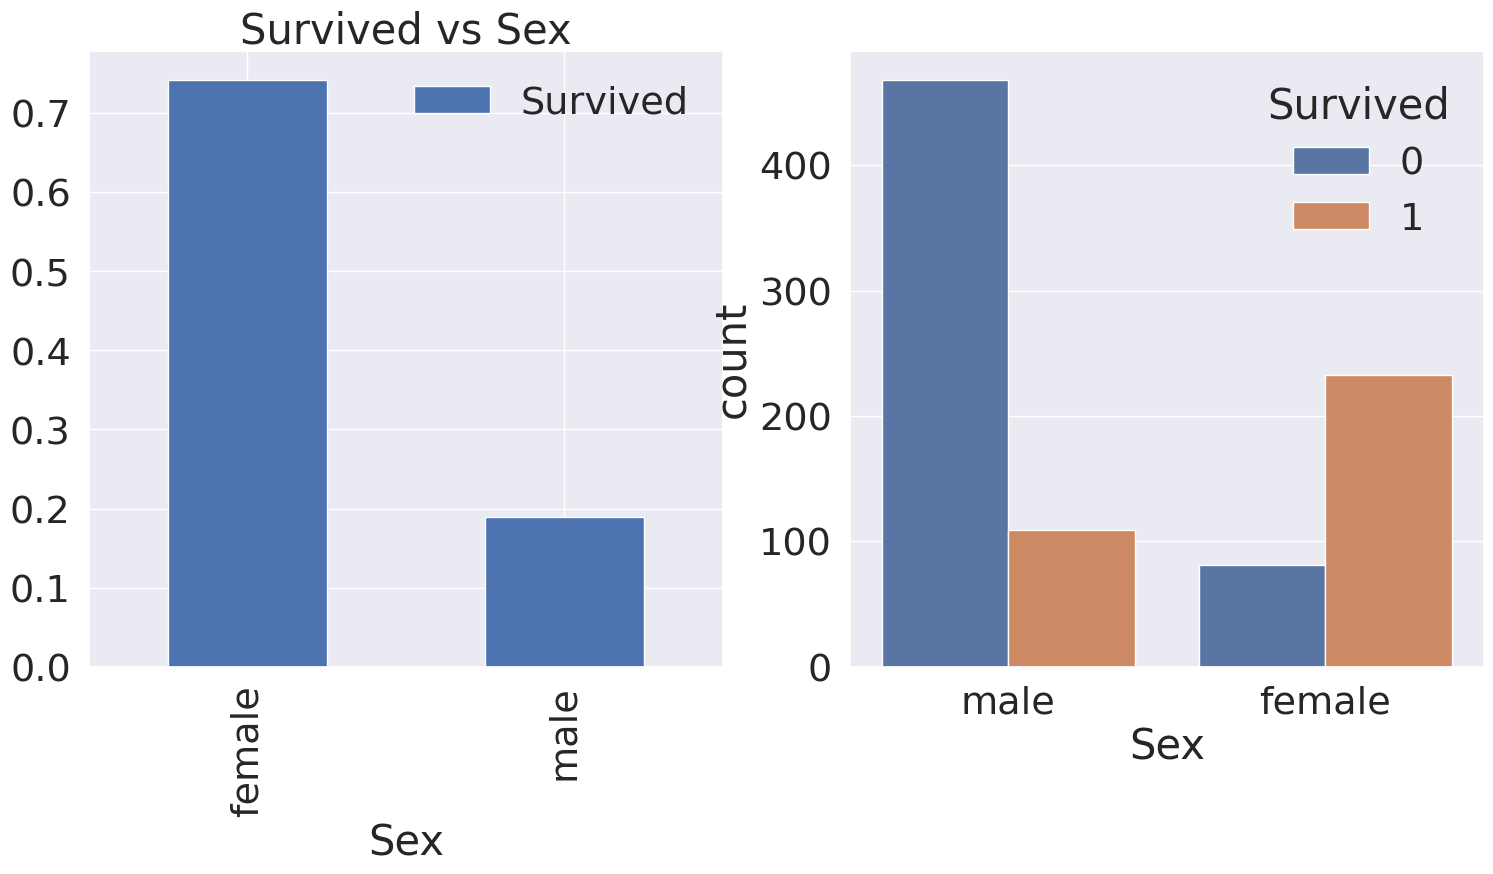

In [453]:
f,ax=plt.subplots(1,2,figsize=(18,8))

train[['Sex','Survived']].groupby('Sex').mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex',hue='Survived',data=train)

Text(0.5, 1.0, 'Survial Rate by Pclass and Sex')

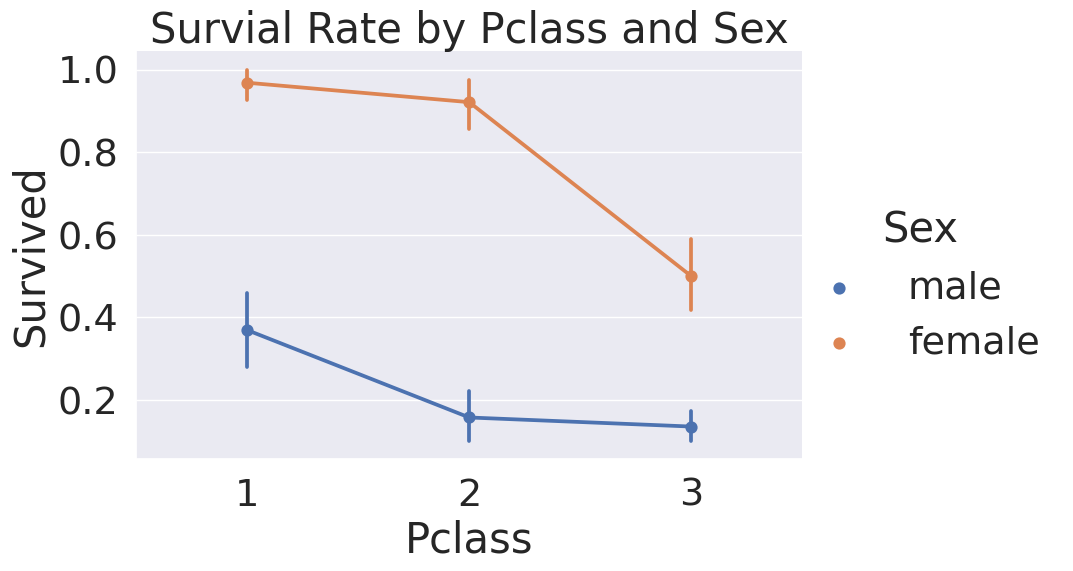

In [454]:
sns.catplot(x='Pclass',hue='Sex',y='Survived',data=train,kind='point',height=6,aspect=1.5)
plt.title('Survial Rate by Pclass and Sex')

In [455]:
train[train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


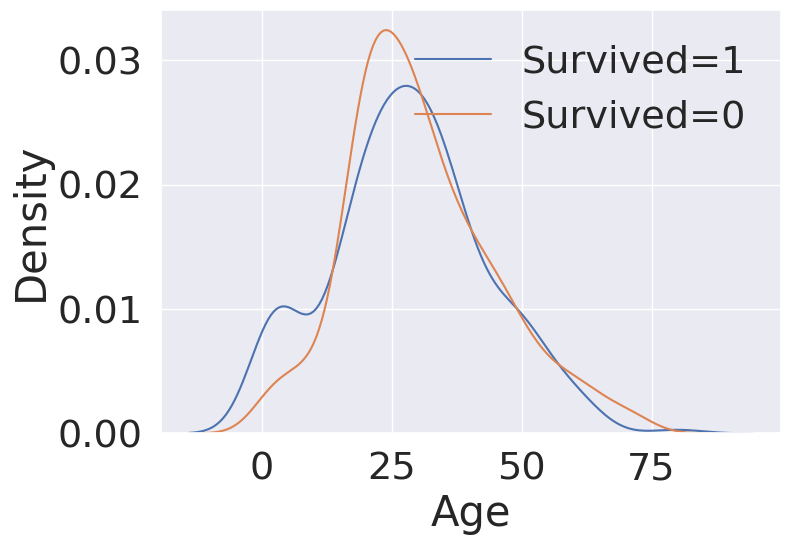

In [456]:
fig,ax=plt.subplots(1,1)
sns.kdeplot(train[train['Survived']==1]['Age'])
sns.kdeplot(train[train['Survived']==0]['Age'])
plt.legend(['Survived=1','Survived=0'])

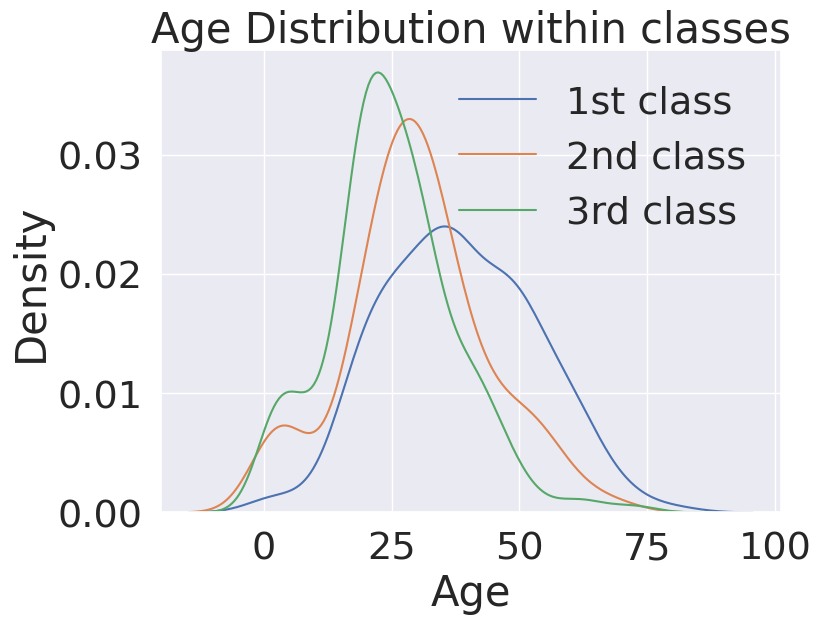

In [457]:
plt.figure(figsize=(8,6))
sns.kdeplot(train[train['Pclass']==1]['Age'])
sns.kdeplot(train[train['Pclass']==2]['Age'])
sns.kdeplot(train[train['Pclass']==3]['Age'])

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class','2nd class','3rd class'])

<AxesSubplot: xlabel='Sex', ylabel='Age'>

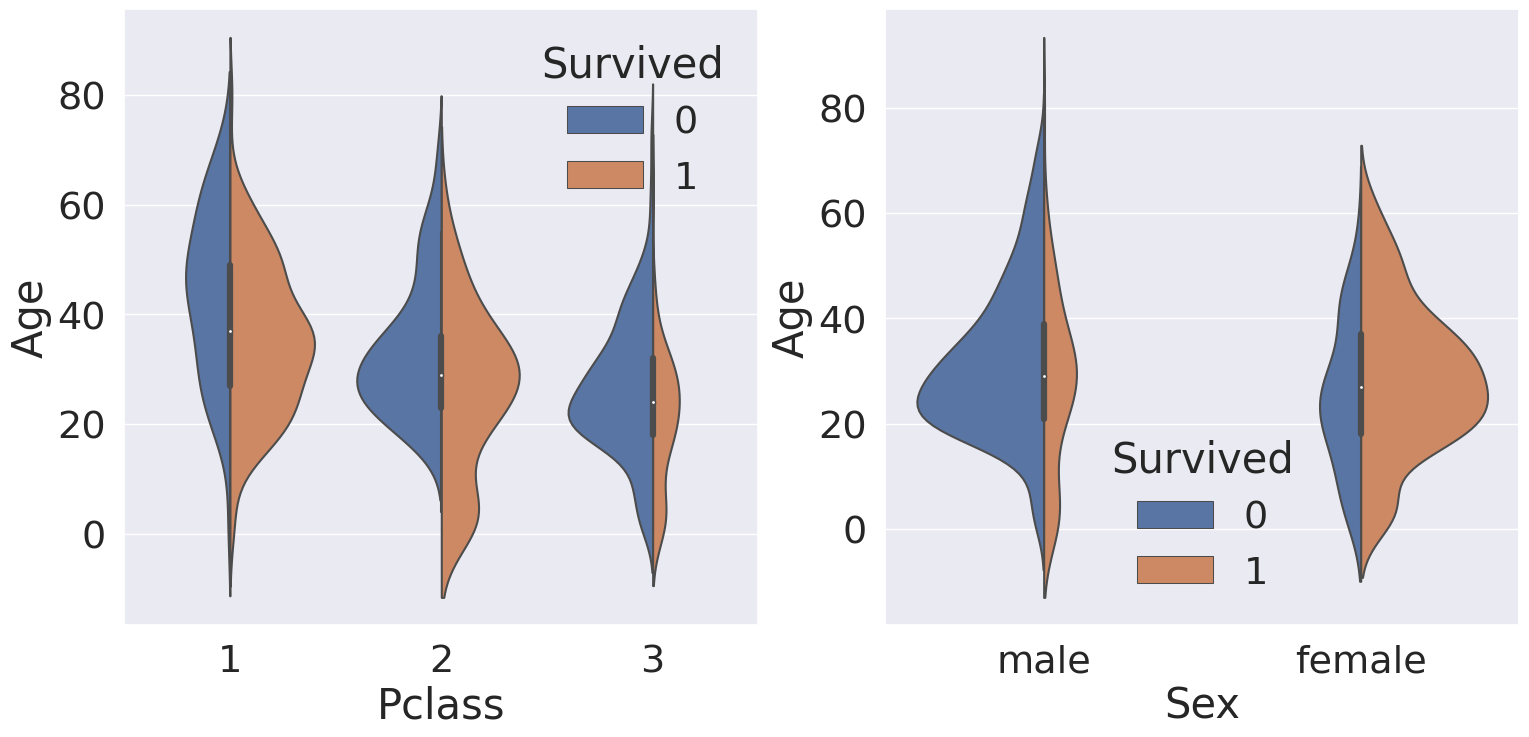

In [458]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot(x='Pclass',hue='Survived',y='Age',data=train,scale='count',ax=ax[0],split=True)
sns.violinplot(x='Sex',hue='Survived',y='Age',data=train,scale='count',ax=ax[1],split=True)

<h1>3. Feature engineering</h1>

In [459]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls


In [460]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

In [461]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [462]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [463]:
train['Fare']=train['Fare'].map(lambda x:np.log(x) if x>=0 else 0)

In [464]:
train.Fare.isnull().sum()

0

In [465]:
test.loc[test.Fare.isnull(),"Fare"]=train['Fare'].mean()

In [466]:
test["Fare"].isnull().sum()

0

In [467]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## Age 

채우기

1. 이름에서 Mrs 이런 거 추출
2. 성별과 엮어서 분류
3. 성별과 나이

In [502]:
train["N"]=train["Name"].str.extract('([a-zA-Z]+)\.')
test["N"]=test["Name"].str.extract('([a-zA-Z]+)\.')

In [474]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,N
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [476]:
pd.crosstab(train["N"],train["Sex"]).T

N,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [503]:
train["N"].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Master','Mlle','Mme','Rev','Sir'],
                   ['Mr','Mr','Mrs','Mr','Mr','Mrs','Mr','Mr','Mr','Mrs','Mrs','Mr','Mr'], inplace=True)

test["N"].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Master','Mlle','Mme','Rev','Sir'],
                   ['Mr','Mr','Mrs','Mr','Mr','Mrs','Mr','Mr','Mr','Mrs','Mrs','Mr','Mr'], inplace=True)

In [478]:
pd.crosstab(train["N"],train["Sex"]).T

N,Miss,Mr,Mrs,Ms
Sex,,,,
female,182,2,129,1
male,0,576,1,0


In [479]:
train.groupby("N").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
N,,,,,,,,
Miss,408.884615,0.697802,2.307692,21.773973,0.714286,0.549451,3.110257,2.263736
Mr,454.280277,0.192042,2.387543,30.788921,0.430796,0.235294,NaN,1.666090
Mrs,461.161538,0.792308,1.961538,35.575221,0.669231,0.800000,NaN,2.469231
Ms,444.000000,1.000000,2.000000,28.000000,0.000000,0.000000,2.564949,1.000000


In [480]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,N
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [504]:
train.loc[(train.Age.isnull())&(train["N"]=='Miss'),"Age"]=22
train.loc[(train.Age.isnull())&(train["N"]=='Mr'),"Age"]=31
train.loc[(train.Age.isnull())&(train["N"]=='Mrs'),"Age"]=36
train.loc[(train.Age.isnull())&(train["N"]=='Ms'),"Age"]=28

test.loc[(test.Age.isnull())&(test["N"]=='Miss'),"Age"]=22
test.loc[(test.Age.isnull())&(test["N"]=='Mr'),"Age"]=31
test.loc[(test.Age.isnull())&(test["N"]=='Mrs'),"Age"]=36
test.loc[(test.Age.isnull())&(test["N"]=='Ms'),"Age"]=28

In [499]:
train.loc[(train.Age.isnull())&(train["N"]=='Miss'),"Age"]

Series([], Name: Age, dtype: float64)

In [507]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [513]:
train.head()

#Sex,Embarked, N

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,N
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [511]:
train['Embarked'].fillna('S',inplace=True)
#train.loc[train.Embarked.isnull(),'Embarked']='S'

In [512]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [521]:
train['Sex']=train['Sex'].map({'male': 0,'female': 1})
train['Embarked']=train['Embarked'].map({'S':0,'C':1,'Q':2})
train['N']=train['N'].map({'Miss':0,'Mr':1,'Mrs':2,'Ms':3})

In [523]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,N
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,1.981001,NaN,NaN,2,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,4.266662,C85,NaN,2,NaN
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,2.070022,NaN,NaN,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,3.972177,C123,NaN,2,NaN
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,2.085672,NaN,NaN,1,NaN


In [520]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
train.drop("PassengerId","Name","Ticket","Cabin","")

In [ ]:
X_train=train.drop()
